# **PROJECT : Predicting Energy NOX emission of a Gas Turbine**

## **Phase 1: EDA and Data Pre-processing**

**Source**

The dataset used for this project was taken from the UCI machine learning
repository :https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set

**Overview**

The datset has attributes such as atmospheric temperature, ambient pressure, ambient humidity, gas turbine inlet and exhaust pressures, and much more. This dataset has readings taken from various sensors in years from 2011 to 2015.The dataset contains information of a gas turbine located in Turkey. This project is going to measure Nitrogen oxide emission of gas turbine by using NOX as target variable.

**Initialisation**
  
- Importing important libraries required for this project
- Reading the datset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [2]:
df = pd.read_csv('gas_turbine_CO.csv')

In [3]:
df.shape

(36733, 12)

In [4]:
df.head()

Unnamed: 0      AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY  \
0           1  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67   
1           2  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67   
2           3  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10   
3           4  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03   
4           5  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67   

      CDP       CO     NOX  
0  11.898  0.32663  81.952  
1  11.892  0.44784  82.377  
2  12.042  0.45144  83.776  
3  11.990  0.23107  82.505  
4  11.910  0.26747  82.028

- **Features**

Tabulating the datset features for a better understanding of the dataset and its variables. The following descriptions are taken from the source of the dataset which is the UCI Machine Learning Repository.

In [5]:
from tabulate import tabulate

table = [['Name', 'Description', 'Units'],
        ['AT', 'Ambient Temperature','Celsius'],
        ['AP', 'Ambient Pressure','mbar'],
        ['AH', 'Ambient Humidity', '%'],
        ['AFDP', 'Air Filter Difference Pressure', 'mbar'],
        ['GTEP', 'Gas Turbine Exhaust Pressure', 'mbar'],
        ['TIT', 'Turbine Inlet temperature', 'Celsius'],
        ['TAT', 'Turbine After temperature', 'Celsius'],
        ['TEY', 'Turbine Energy Yield', 'Megawatt hour (MWH)'],
        ['CDP', 'Compressor Discharge Pressure', 'mbar'],
        ['CO', 'Carbon monoxide content','mg/m3'],
        ['NOX', 'Nitrogen oxides content', 'mg/mg3']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤════════════════════════════════╤═════════════════════╕
│ Name   │ Description                    │ Units               │
╞════════╪════════════════════════════════╪═════════════════════╡
│ AT     │ Ambient Temperature            │ Celsius             │
├────────┼────────────────────────────────┼─────────────────────┤
│ AP     │ Ambient Pressure               │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ AH     │ Ambient Humidity               │ %                   │
├────────┼────────────────────────────────┼─────────────────────┤
│ AFDP   │ Air Filter Difference Pressure │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ GTEP   │ Gas Turbine Exhaust Pressure   │ mbar                │
├────────┼────────────────────────────────┼─────────────────────┤
│ TIT    │ Turbine Inlet temperature      │ Celsius             │
├────────┼────────────────────────────────┼─────────────────────┤
│ TAT    │

In [6]:
df.isnull().sum()

Unnamed: 0    0
AT            0
AP            0
AH            0
AFDP          0
GTEP          0
TIT           0
TAT           0
TEY           0
CDP           0
CO            0
NOX           0
dtype: int64

There are no null values present in any variable in the dataset. Dropping of observations is therefore not required.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36733 non-null  int64  
 1   AT          36733 non-null  float64
 2   AP          36733 non-null  float64
 3   AH          36733 non-null  float64
 4   AFDP        36733 non-null  float64
 5   GTEP        36733 non-null  float64
 6   TIT         36733 non-null  float64
 7   TAT         36733 non-null  float64
 8   TEY         36733 non-null  float64
 9   CDP         36733 non-null  float64
 10  CO          36733 non-null  float64
 11  NOX         36733 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


In [8]:
df.columns

Index(['Unnamed: 0', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY',
       'CDP', 'CO', 'NOX'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 0'], axis=1,inplace=True) 

In [10]:
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   

        CO     NOX  
0  0.32663  81.952  
1  0.44784  82.377  
2  0.45144  83.776  
3  0.23107  82.505  
4  0.26747  82.028

In [11]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

                NOX  
count  36733.000000  
mean      65.293067  
std       11.678357  
min       25.905000  
25%       57.162000  
50%       63.849000  
75%       71.548000  
max      119.910000

**Handling duplicates**

In [12]:
df[df.duplicated()]

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
26399  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
26400  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
26401  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
26402  23.156  1004.2  95.938  4.0547  24.672  1076.6  549.87  127.01  11.835   
27389  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14  13.038   
27390  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14  13.038   
27391  26.067  1008.3  87.328  5.0703  29.984  1099.1  546.78  146.14  13.038   

           CO     NOX  
26399  1.7056  47.352  
26400  1.7056  47.352  
26401  1.7056  47.352  
26402  1.7056  47.352  
27389  1.3163  52.564  
27390  1.3163  52.564  
27391  1.3163  52.564

In [13]:
df.drop_duplicates(inplace=True)  

In [14]:
df.shape

(36726, 11)

**Preprocess and Cleaning**

- Checking for any irrelevant features in the dataset and dropping them.
  
- Checking for null / missing values.
  
- Check for different data types.

**Exploratory Data Analysis through Visualisation**

The data pre processing is now complete and the dataset is clean to proceed with further analysis. Then use various graphs to understand the data better.

# **Histplot**

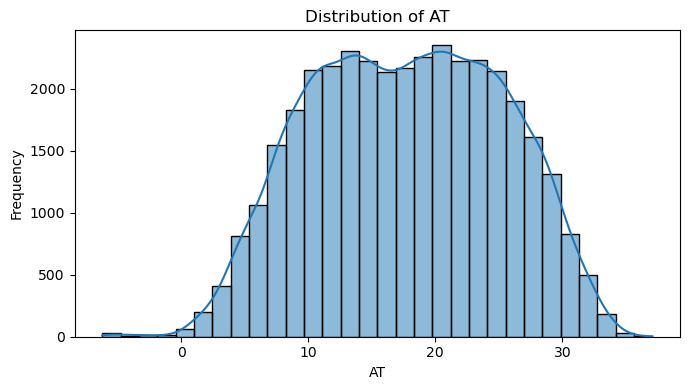

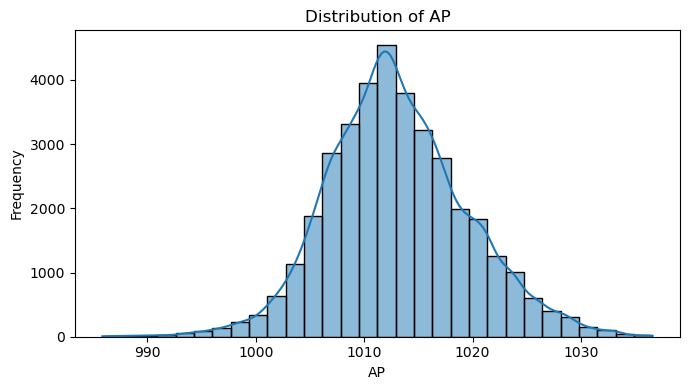

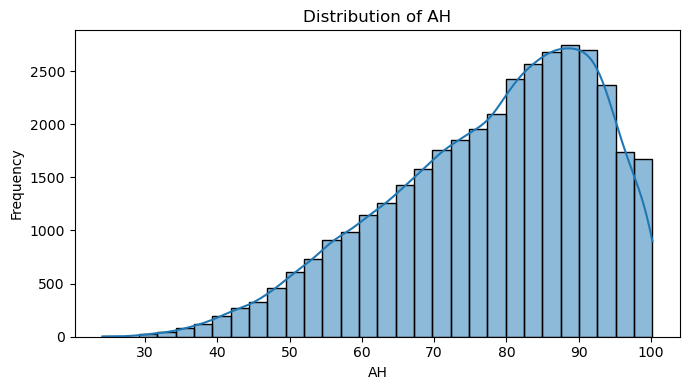

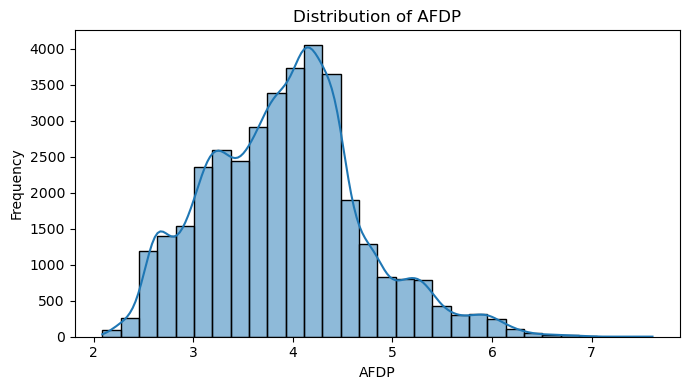

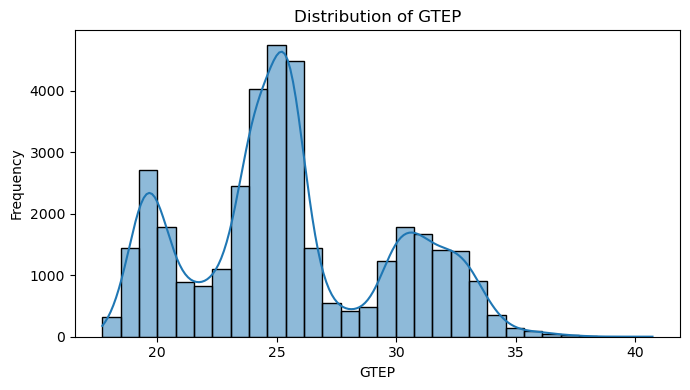

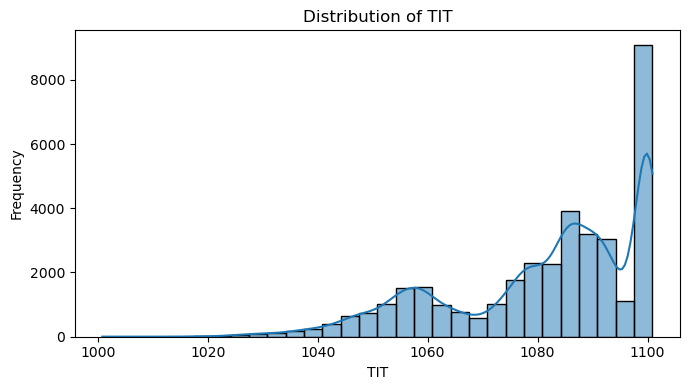

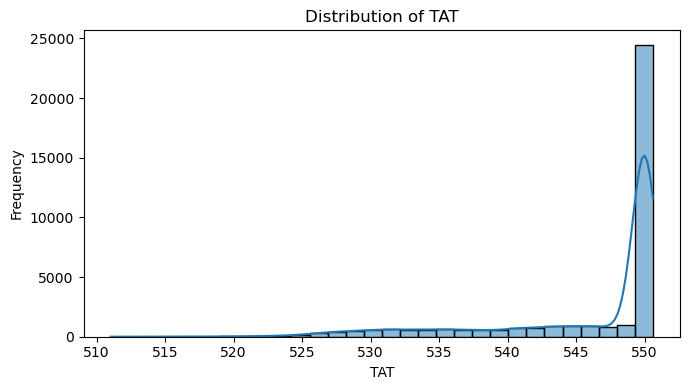

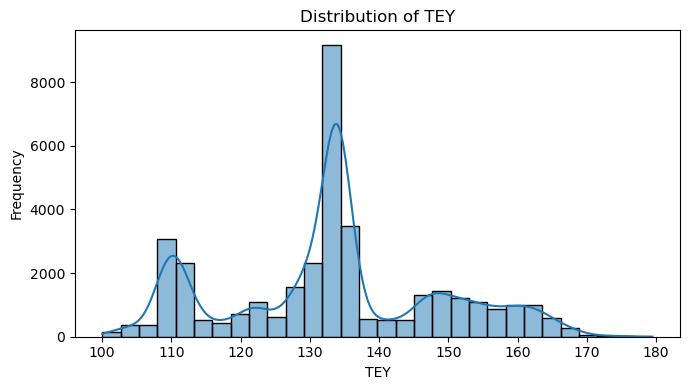

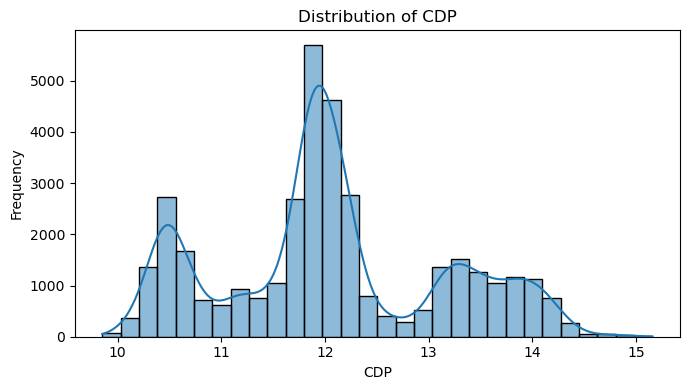

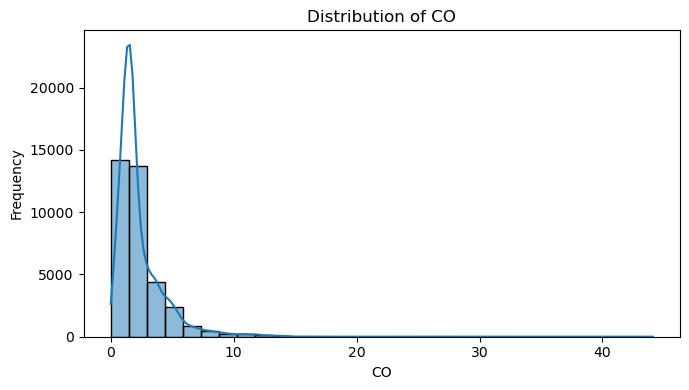

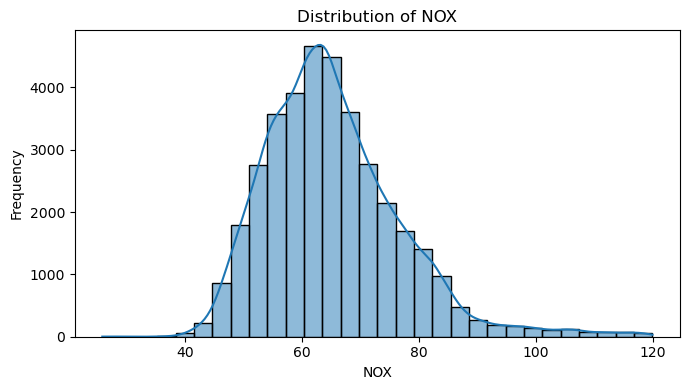

In [15]:
columns= ['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX']

for col in columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

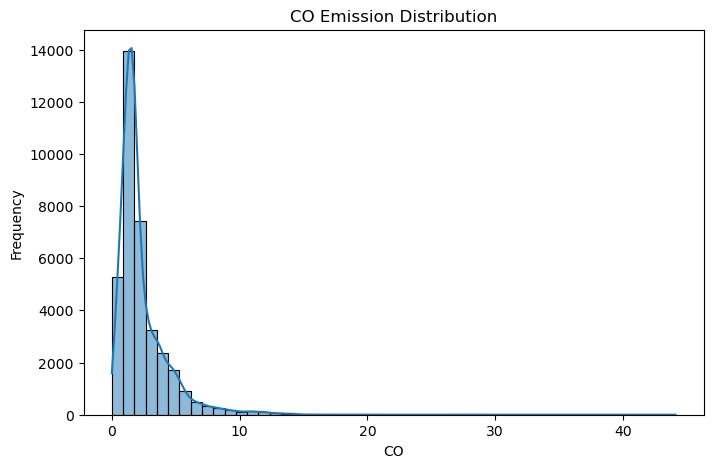

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['CO'], bins=50, kde=True)
plt.title('CO Emission Distribution')
plt.xlabel('CO')
plt.ylabel('Frequency')
plt.show()

In [17]:
skewness = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
print(skewness)

CO      4.837711
NOX     1.026958
AFDP    0.381316
GTEP    0.329131
CDP     0.236888
AP      0.193860
TEY     0.116583
AT     -0.043197
AH     -0.627834
TIT    -0.888239
TAT    -1.755644
dtype: float64


**CO in gas turbines is right skewed**

In [18]:
df['CO'] = np.log1p(df['CO'])

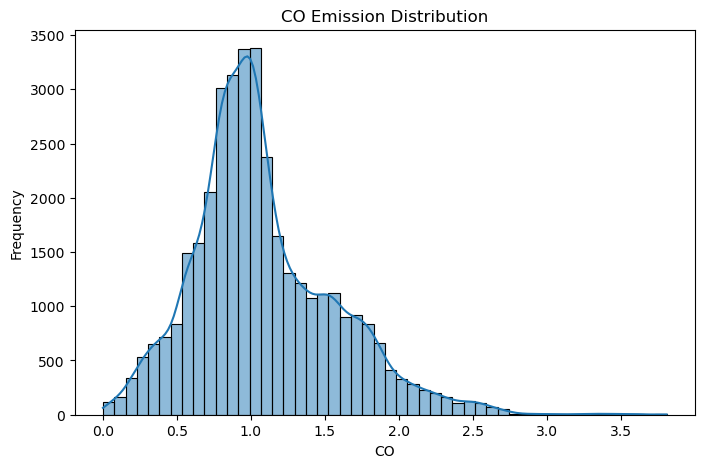

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['CO'], bins=50, kde=True)
plt.title('CO Emission Distribution')
plt.xlabel('CO')
plt.ylabel('Frequency')
plt.show()

# **Pairplot**

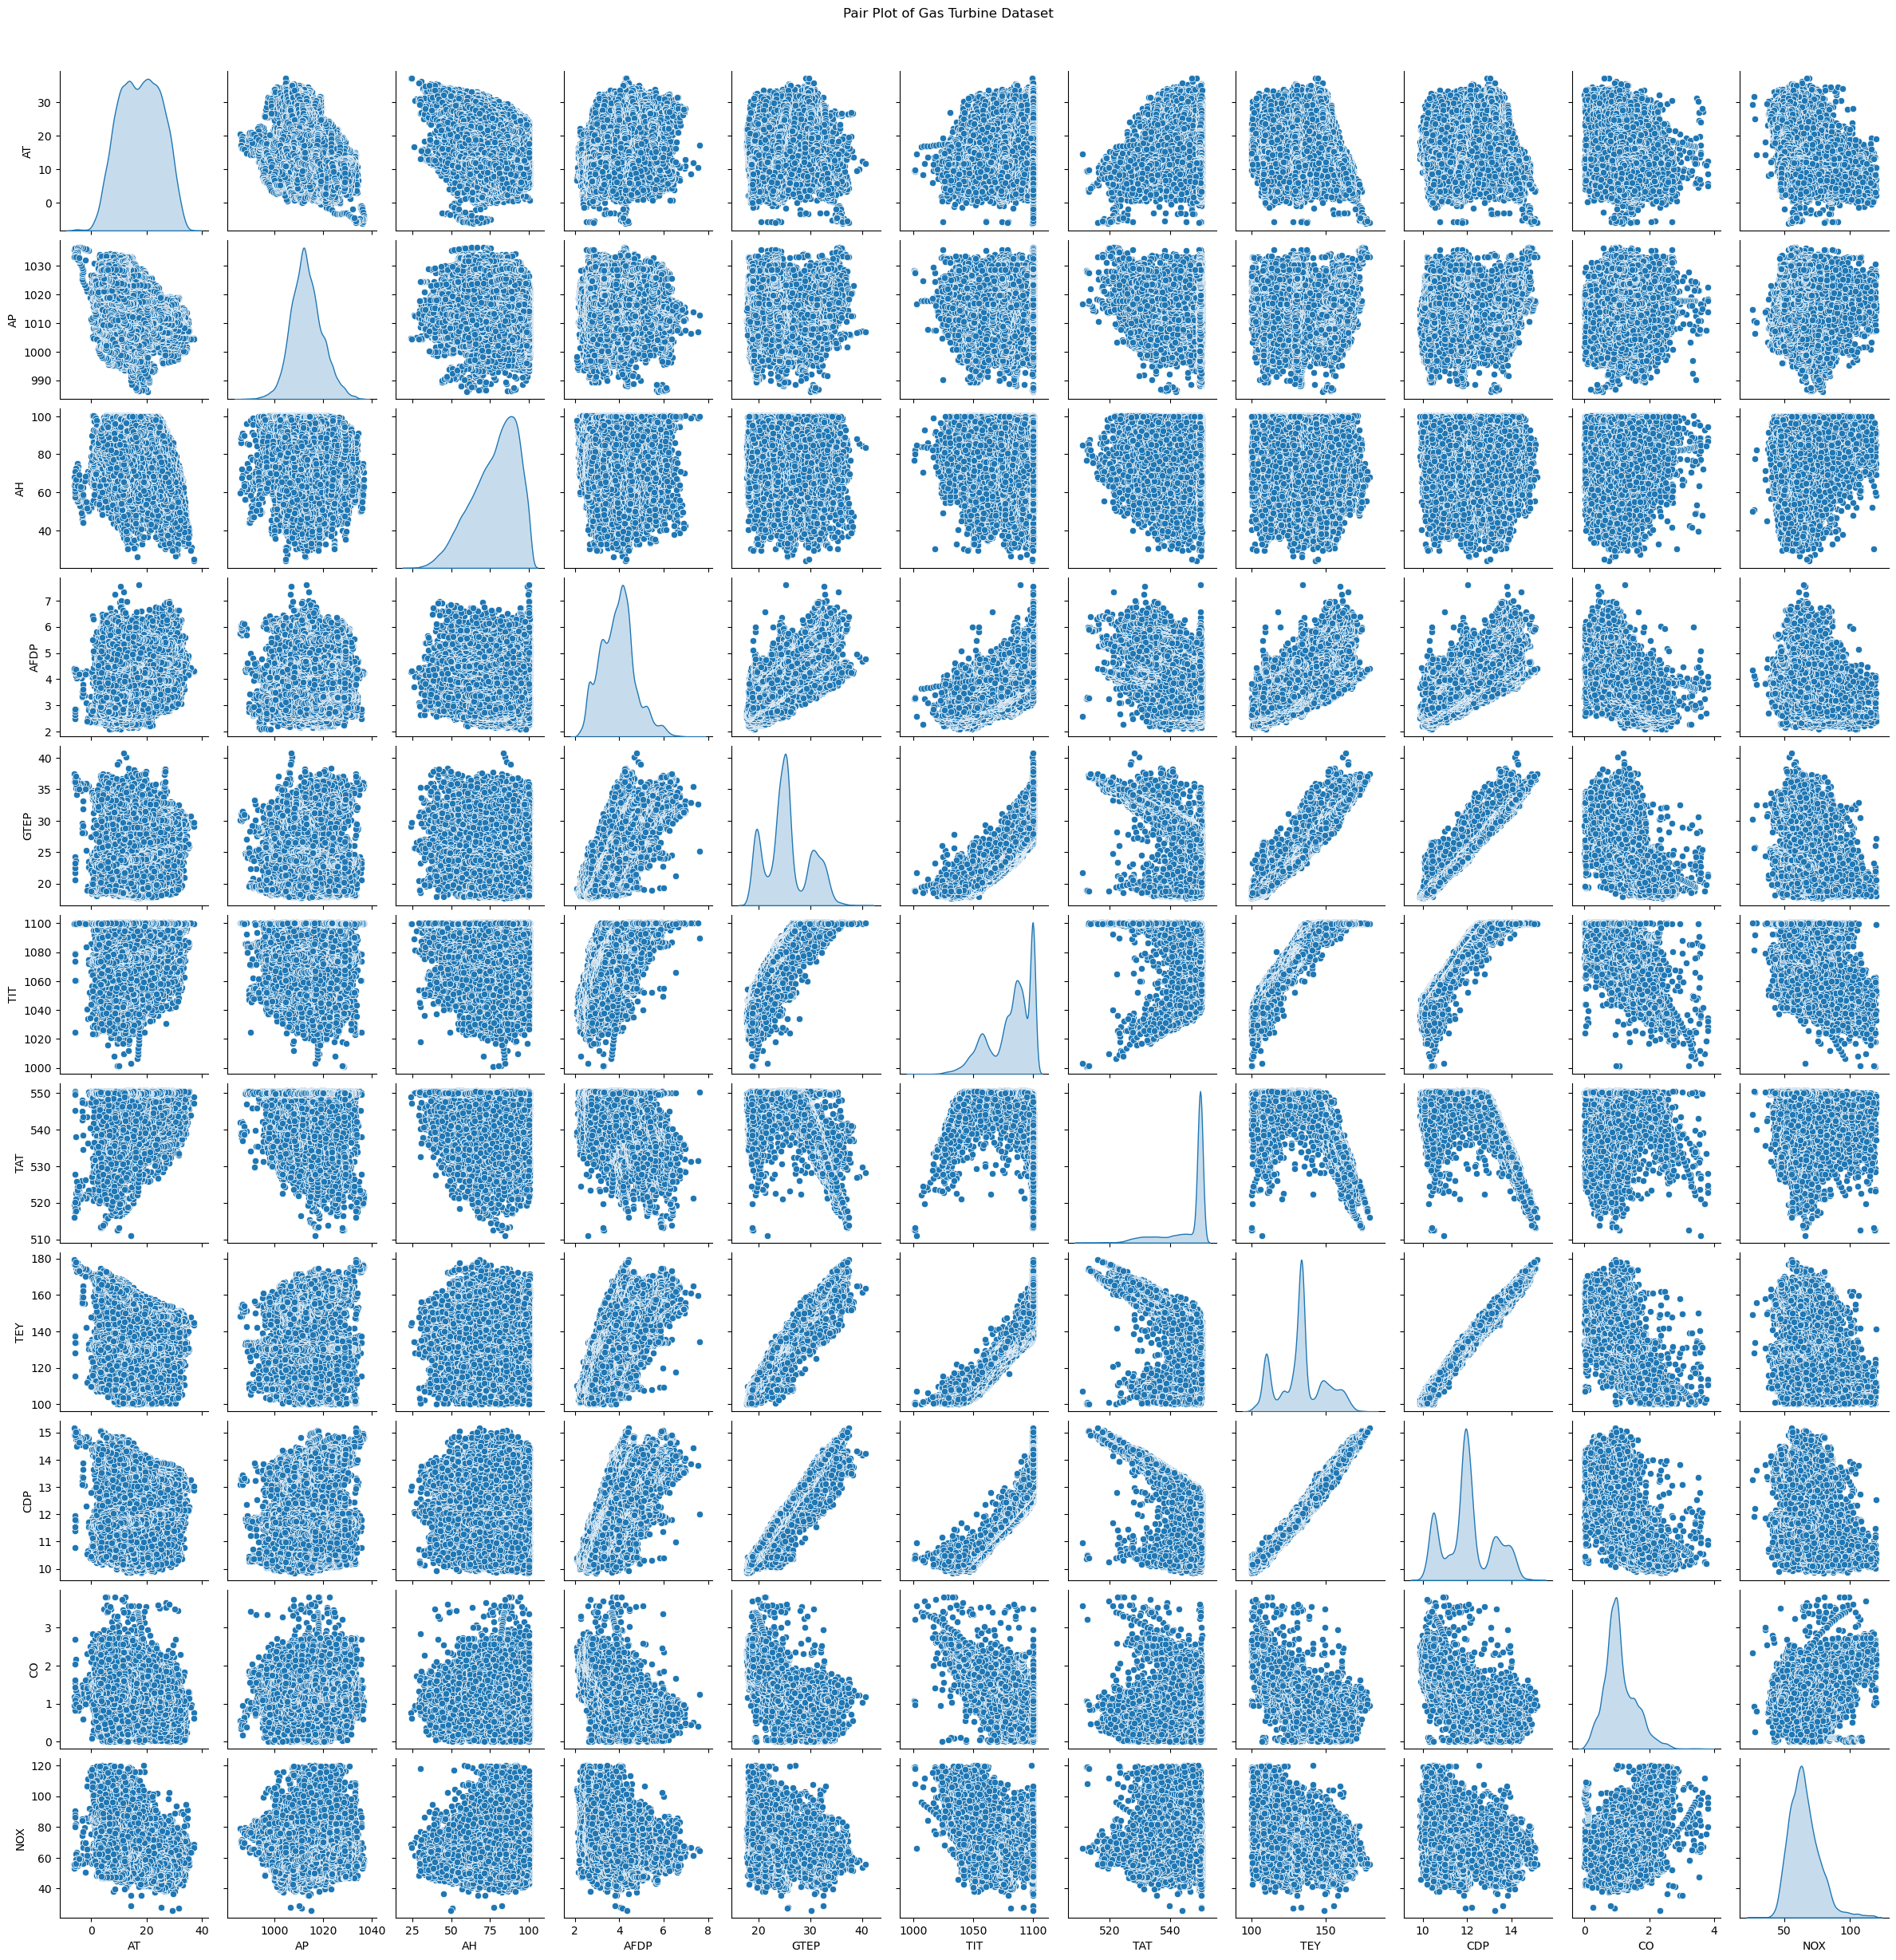

In [20]:
sns.pairplot(df,
             diag_kind='kde',
             height=2.2)
plt.suptitle('Pair Plot of Gas Turbine Dataset', y=1.02)
plt.show()

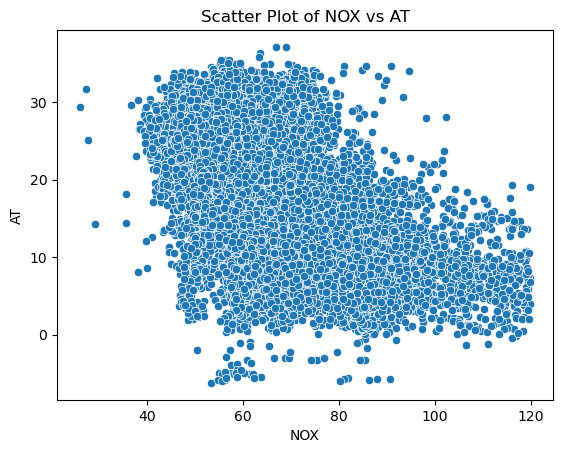

In [21]:
sns.scatterplot(x= 'NOX',y='AT', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs AT')
plt.show()

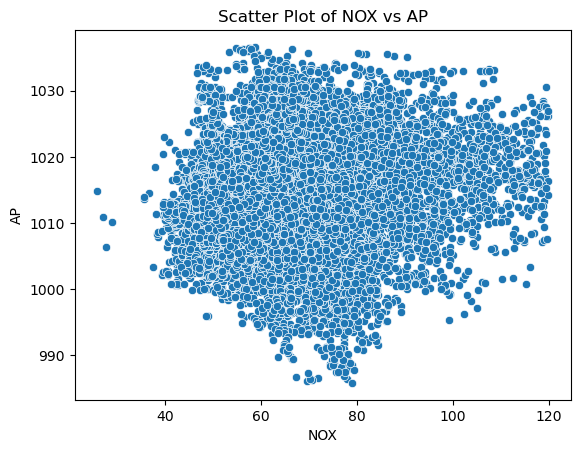

In [22]:
sns.scatterplot(x= 'NOX',y='AP', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs AP')
plt.show()

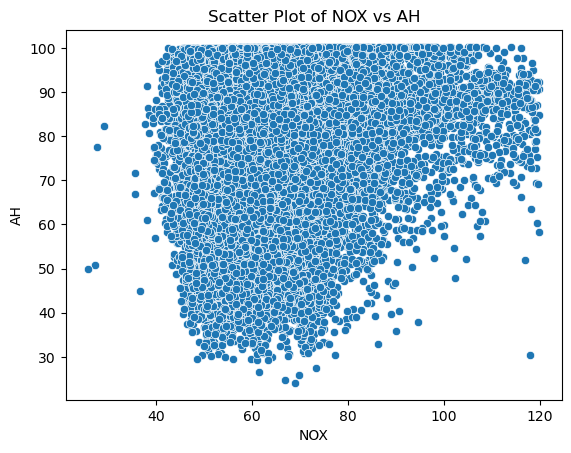

In [23]:
sns.scatterplot(x= 'NOX',y='AH', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs AH')
plt.show()

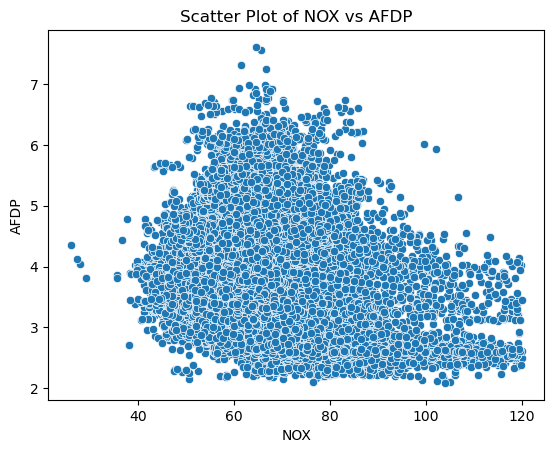

In [24]:
sns.scatterplot(x= 'NOX',y='AFDP', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs AFDP')
plt.show()

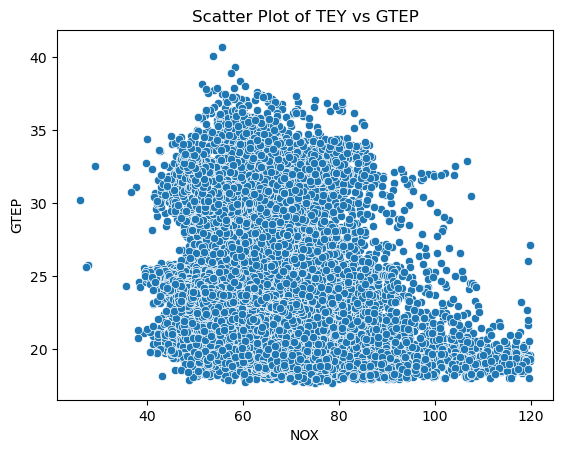

In [25]:
sns.scatterplot(x= 'NOX',y='GTEP', data=df, palette='coolwarm')
plt.title('Scatter Plot of TEY vs GTEP')
plt.show()

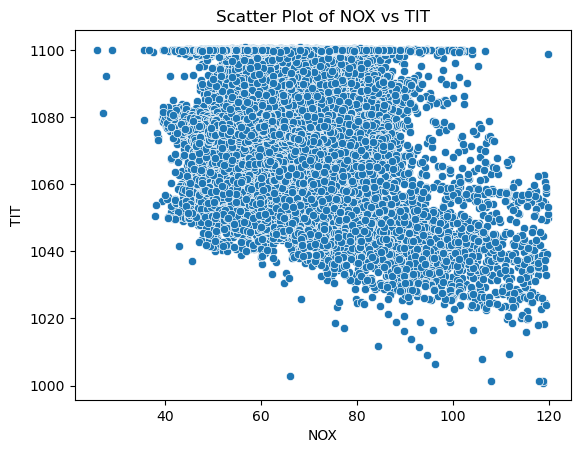

In [26]:
sns.scatterplot(x= 'NOX',y='TIT', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs TIT')
plt.show()

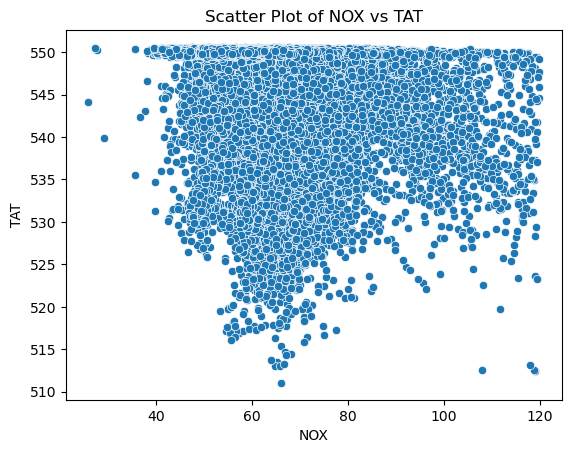

In [27]:
sns.scatterplot(x= 'NOX',y='TAT', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs TAT')
plt.show()

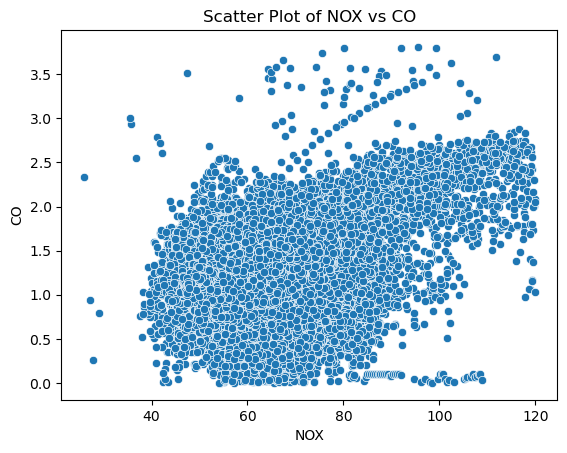

In [28]:
sns.scatterplot(x= 'NOX',y='CO', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs CO')
plt.show()

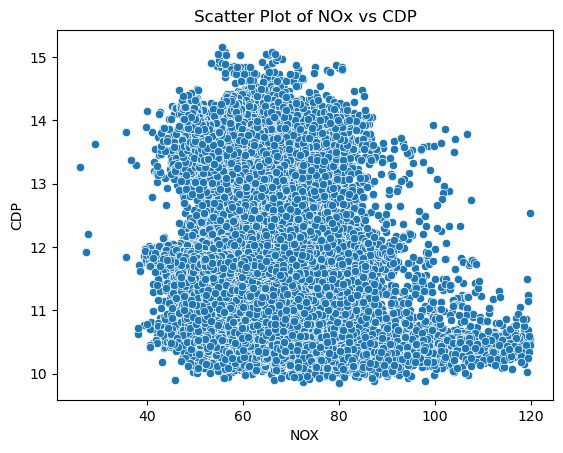

In [29]:
sns.scatterplot(x= 'NOX',y='CDP', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOx vs CDP')
plt.show()

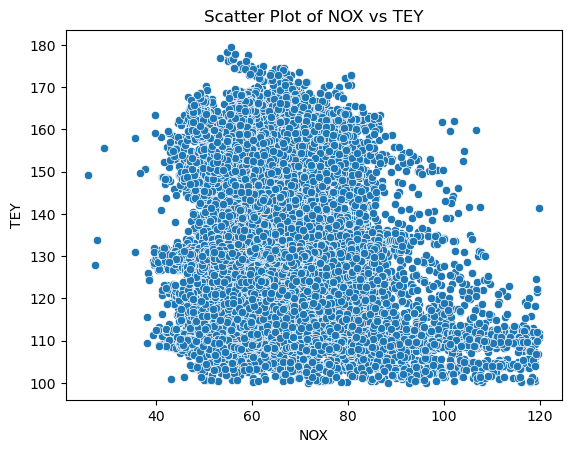

In [30]:
sns.scatterplot(x= 'NOX',y='TEY', data=df, palette='coolwarm')
plt.title('Scatter Plot of NOX vs TEY')
plt.show()

From the plots above, we can see that NOX is not correlated  with the features.So, NOX is nonlinear with most features.

In [31]:
df.tail()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  
36728  2.484323   89.172  
36729  2.496835   88.849  
36730  2.518825   96.147  
36731  1.461726   64.738  
36732  2.563487  109.240

# **Barplot**

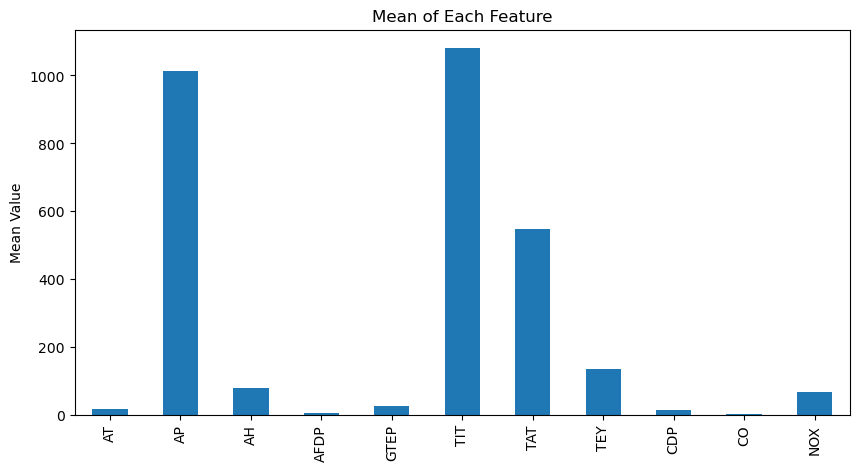

In [32]:
labels = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX']
df[labels].mean().plot(kind='bar', figsize=(10,5))
plt.title("Mean of Each Feature")
plt.ylabel("Mean Value")
plt.show()

**Just created a barplot of mean values of each features.**

# **Boxplot**

<Axes: >

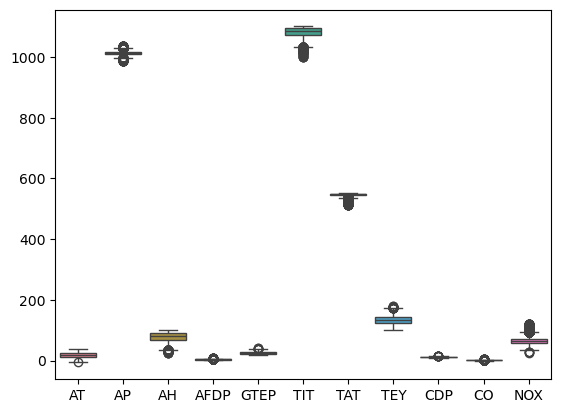

In [33]:
sns.boxplot(df)

<Axes: ylabel='TIT'>

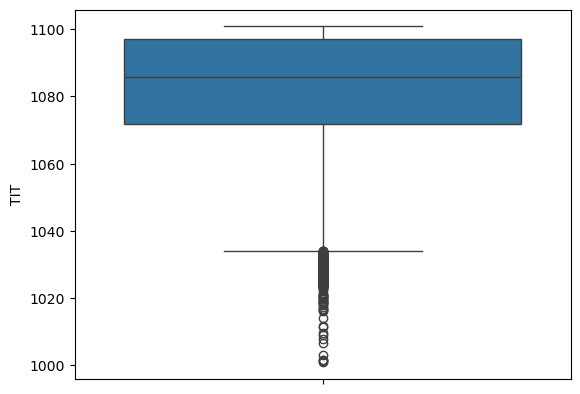

In [34]:
sns.boxplot(df['TIT'])

<Axes: ylabel='NOX'>

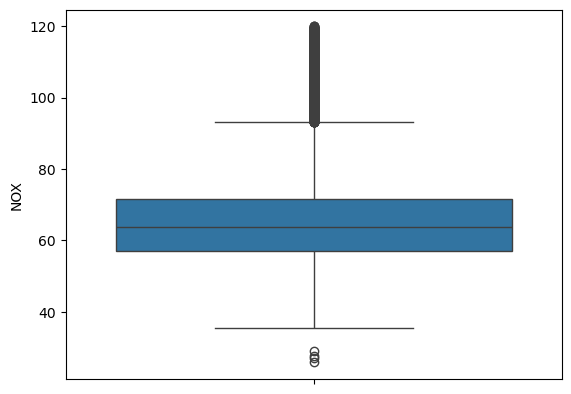

In [35]:
sns.boxplot(df['NOX'])

# **Handling Outliers**

In [36]:
cols = ['TIT', 'CO', 'NOX']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

<Axes: ylabel='NOX'>

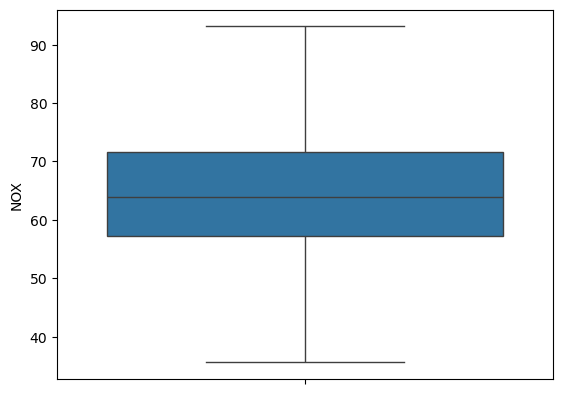

In [37]:
sns.boxplot(df['NOX'])

<Axes: ylabel='CO'>

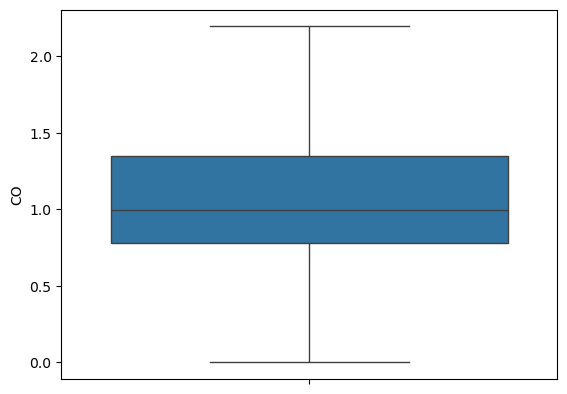

In [38]:
sns.boxplot(df['CO'])

<Axes: ylabel='TIT'>

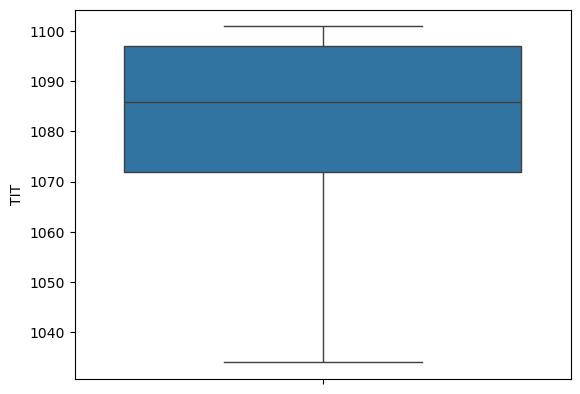

In [39]:
sns.boxplot(df['TIT'])

# **Heatmap**

<Axes: >

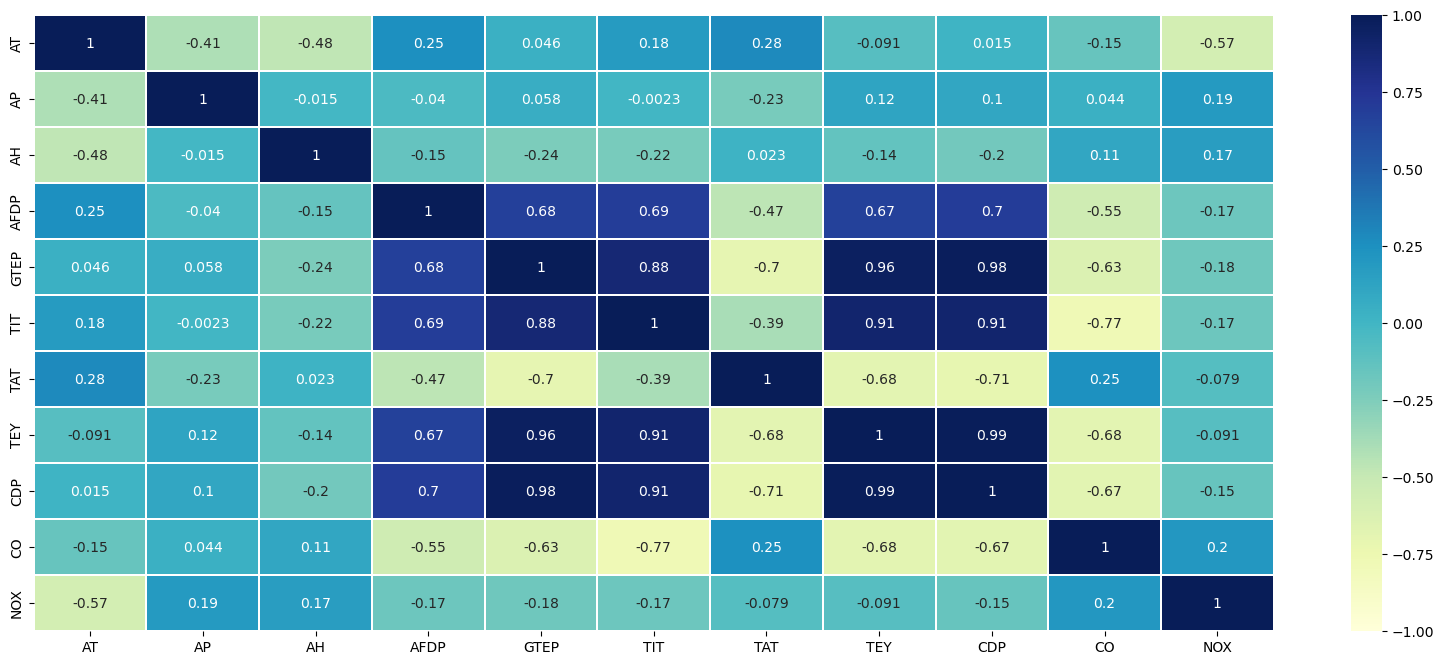

In [40]:
corrmatrix=df.corr()
#corrmatrix
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

The heatmap reveals strong multicollinearity among several features. 

# **Phase 2 : Feature Selection and Model Building**

**Feature Selection**

For our feature seelction, we first drop the target variable and make a copy of the dataset. 

In [41]:
x=df.drop('NOX',axis=1)
y=df['NOX']

In [42]:
x

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO  
0      0.282642  
1      0.370073  
2      0.372556  
3      0.207884  
4      0.237023  
...         ...  
36728  2.195275  
36729  2.195275  
36730  2.195275  
36731  1.461726  
36732  2.195275  

[36726 rows x 10 columns]

In [43]:
y

0        81.952000
1        82.377000
2        83.776000
3        82.505000
4        82.028000
           ...    
36728    89.172000
36729    88.849000
36730    93.126125
36731    64.738000
36732    93.126125
Name: NOX, Length: 36726, dtype: float64

## Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
normalisation = MinMaxScaler()
x=normalisation.fit_transform(x)
# Coverting to Dataframe
x=pd.DataFrame(x)
x.describe()

0             1             2             3             4  \
count  36726.000000  36726.000000  36726.000000  36726.000000  36726.000000   
mean       0.552549      0.536385      0.706553      0.332780      0.341712   
std        0.171849      0.127353      0.189992      0.140125      0.182299   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.415666      0.452217      0.579354      0.229600      0.235870   
50%        0.554546      0.527094      0.740728      0.334960      0.321770   
75%        0.689901      0.613793      0.857765      0.414506      0.493570   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  
count  36726.000000  36726.000000  36726.000000  36726.000000  36726.000000  
mean       0.709735      0.887492      0.421315      0.416165      0.489431  
std        0.259670      0.172932      0.196522      0.205167      0.208601  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.565022      0.851150      0.307373      0.298123      0.355373  
50%        0.775785      0.981552      0.424132      0.398176      0.454659  
75%        0.941704      0.985595      0.554353      0.565637      0.613224  
max        1.000000      1.000000      1.000000      1.000000      1.000000

## Train and Test splitting

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [47]:
x

0         1         2         3         4         5         6  \
0      0.249727  0.647291  0.782894  0.269481  0.272873  0.780269  0.980288   
1      0.242929  0.639409  0.790252  0.268594  0.271657  0.778774  0.985848   
2      0.233960  0.641379  0.798437  0.270749  0.273351  0.784753  0.989386   
3      0.230247  0.639409  0.806004  0.270387  0.269919  0.784753  0.988880   
4      0.230432  0.629557  0.802693  0.269898  0.270180  0.775785  0.984584   
...         ...       ...       ...       ...       ...       ...       ...   
36721  0.227552  0.840394  0.908034  0.195303  0.060344  0.044843  0.772050   
36722  0.240026  0.842365  0.919017  0.200047  0.057260  0.053812  0.789487   
36723  0.270360  0.840394  0.934560  0.221864  0.050352  0.059791  0.819813   
36724  0.279629  0.844335  0.921172  0.343225  0.254801  0.641256  0.987364   
36725  0.283217  0.846305  0.925731  0.323689  0.209662  0.506726  0.939853   

              7         8         9  
0      0.435959  0.385552  0.128596  
1      0.435959  0.384421  0.168430  
2      0.441369  0.412685  0.169562  
3      0.440488  0.402887  0.094536  
4      0.435959  0.387813  0.107812  
...         ...       ...       ...  
36721  0.113991  0.105366  1.000000  
36722  0.110342  0.092742  1.000000  
36723  0.098012  0.114976  1.000000  
36724  0.394942  0.361622  0.665792  
36725  0.319451  0.303399  1.000000  

[36726 rows x 10 columns]

## Model Building

**Linear Regression**

In [48]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred1 = lr_model.predict(x_test)
y_pred1

array([59.11194143, 69.4164202 , 60.27151046, ..., 50.72754963,
       72.29710333, 68.90046068])

**Model Evaluation**

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

In [50]:
mae

5.203145949284961

In [51]:
mse

50.569824791862054

In [52]:
r2

0.5634241489595819

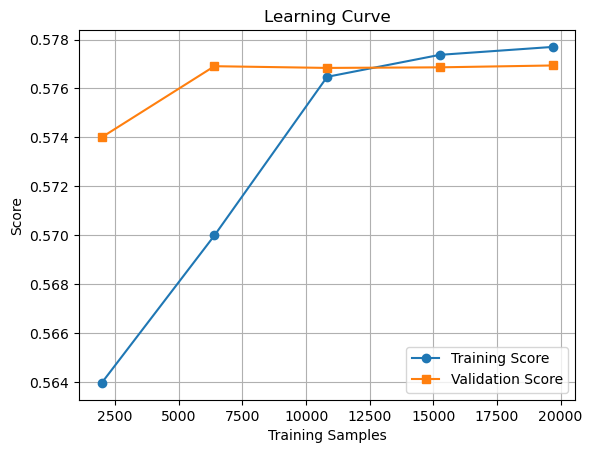

In [53]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    lr_model, x_train, y_train, cv=5, scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.plot(train_sizes, test_mean, marker='s', label='Validation Score')
plt.legend()
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.grid()
plt.show()

**This model is Underfitting, it cannot even fit the training data strongly.**

**Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred2 = dtr.predict(x_test)
y_pred2

array([50.643, 66.405, 50.771, ..., 52.716, 67.338, 66.893])

In [55]:
r2 = r2_score(y_test, y_pred2)
r2

0.747417603726521

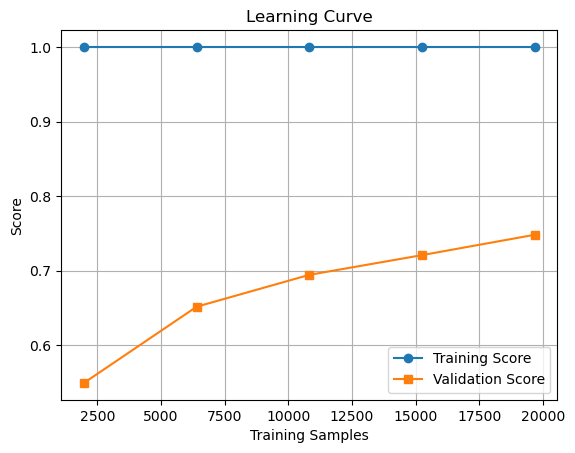

In [56]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    dtr, x_train, y_train, cv=5, scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.plot(train_sizes, test_mean, marker='s', label='Validation Score')
plt.legend()
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.grid()
plt.show()

**Very high train score, validation improves with more data, but gap never disappears. This is showing Overfitting.**

**Random Forest**

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=600,max_depth=40, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42,n_jobs=-1 )
rfr.fit(x_train,y_train)
y_pred3 = rfr.predict(x_test)
y_pred3

array([51.598765  , 63.79998833, 53.83587   , ..., 51.92986333,
       71.93911   , 66.53198667])

In [58]:
r2 = r2_score(y_test, y_pred3)
r2

0.885711659269566

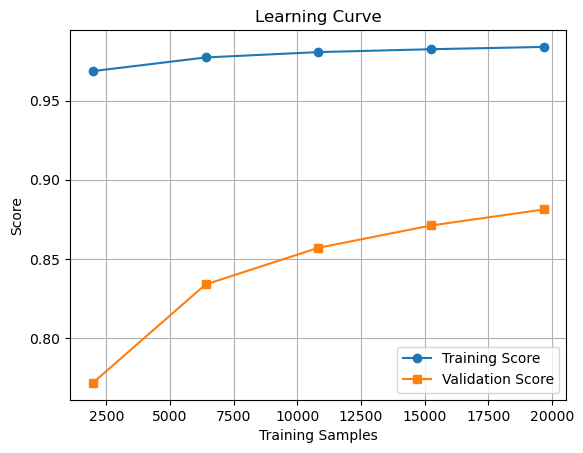

In [59]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    rfr, x_train, y_train, cv=5, scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.plot(train_sizes, test_mean, marker='s', label='Validation Score')
plt.legend()
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.grid()
plt.show()

**Most stable and good fit.Training score slightly decreases, it's normal. Validation score increases, very good
Both curves approach a plateau, it's a perfect learning behavior**

**Gradient Boosting Regressor**

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)
y_pred4=gb_reg.predict(x_test)

y_pred4

array([52.58905658, 63.44052833, 52.20105559, ..., 54.54968617,
       75.05227458, 65.44527273])

In [61]:
r2 = r2_score(y_test, y_pred4)
r2

0.7450409131832703

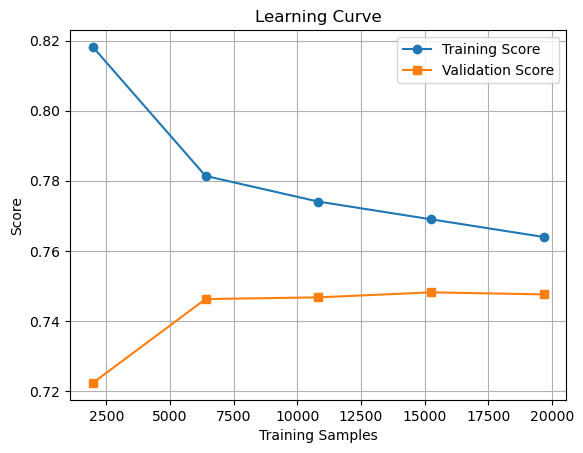

In [62]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    gb_reg, x_train, y_train, cv=5, scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.plot(train_sizes, test_mean, marker='s', label='Validation Score')
plt.legend()
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.grid()
plt.show()

**The Gradient Boosting model on early datas shows underfitting(early scores look weak), as indicated by lower training and validation scores and slow improvement with increased training samples.**

**KNN**

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred5=knn.predict(x_test)
y_pred5

array([51.188 , 65.8286, 52.3086, ..., 50.1844, 72.992 , 68.411 ])

In [64]:
r2 = r2_score(y_test, y_pred5)
r2

0.8724247117457127

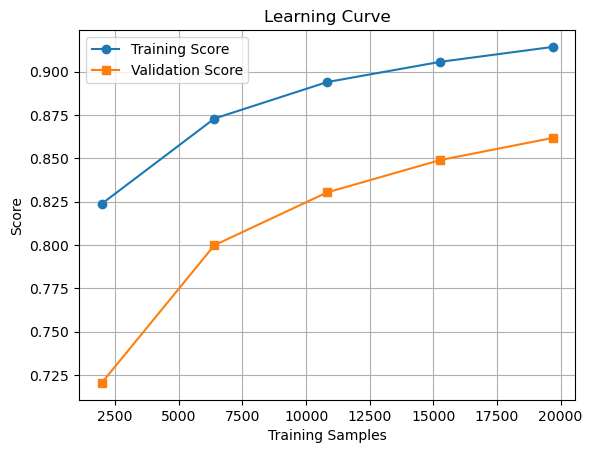

In [65]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    knn, x_train, y_train, cv=5, scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.plot(train_sizes, test_mean, marker='s', label='Validation Score')
plt.legend()
plt.xlabel('Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.grid()
plt.show()


**The curves are converging : So, good fit.**

# **Conclusion**

In Phase 1 of this project, data cleaning, preprocessing, and visualization were performed. In phase 2, based on model evaluation metrics, Random Forest outperformed the other models, achieving the best overall predictive performance, indicating it is the most suitable model for this dataset.